In [34]:
%pip install nltk wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [35]:
#import libraries

import os
import nltk
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

In [36]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# read the whole novel Great Expectations
with open('../data/great_expectations.txt', 'r', encoding='utf-8') as file:
    filedata = file.read()

# check the contents
print(filedata[0:500])

Chapter I.

My father’s family name being Pirrip, and my Christian name Philip, my
infant tongue could make of both names nothing longer or more explicit
than Pip. So, I called myself Pip, and came to be called Pip.

I give Pirrip as my father’s family name, on the authority of his
tombstone and my sister,—Mrs. Joe Gargery, who married the blacksmith.
As I never saw my father or my mother, and never saw any likeness of
either of them (for their days were long before the days of
photographs), my 


In [38]:
#read text using the Corpus Reader
from nltk.corpus import PlaintextCorpusReader

#read the file into a corpus
corpus = PlaintextCorpusReader(os.getcwd() + '/../data/', 'great_expectations.txt')

#print the beginning of the corpus
print(corpus.raw()[:500])

Chapter I.

My father’s family name being Pirrip, and my Christian name Philip, my
infant tongue could make of both names nothing longer or more explicit
than Pip. So, I called myself Pip, and came to be called Pip.

I give Pirrip as my father’s family name, on the authority of his
tombstone and my sister,—Mrs. Joe Gargery, who married the blacksmith.
As I never saw my father or my mother, and never saw any likeness of
either of them (for their days were long before the days of
photographs), my 


In [39]:
#extract the file ids
file_ids = corpus.fileids()
print('Files in this corpus:', file_ids)

#extract the paragraphs
paragraphs = corpus.paras('great_expectations.txt')
print('No. of paragraphs:', len(paragraphs))

#extract the sentences
sentences = corpus.sents('great_expectations.txt')
print('No. of sentences:', len(sentences))

words = corpus.words()
print('No. of words:', len(words))

Files in this corpus: ['great_expectations.txt']
No. of paragraphs: 3908
No. of paragraphs: 3908
No. of sentences: 9190
No. of words: 226639
No. of sentences: 9190
No. of words: 226639


In [40]:
#extract tokens
token_list = nltk.word_tokenize(corpus.raw('great_expectations.txt'))
print('No. of tokens:', len(token_list))
print('First 10 tokens:', token_list[0:20])

No. of tokens: 225604
First 10 tokens: ['Chapter', 'I', '.', 'My', 'father', '’', 's', 'family', 'name', 'being', 'Pirrip', ',', 'and', 'my', 'Christian', 'name', 'Philip', ',', 'my', 'infant']


In [41]:
# remove punctuation marks

token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))

print('Total tokens without punctuation:', len(token_list2))
print('Some tokens:', token_list2[0:20])

Total tokens without punctuation: 187354
Some tokens: ['Chapter', 'I', 'My', 'father', 's', 'family', 'name', 'being', 'Pirrip', 'and', 'my', 'Christian', 'name', 'Philip', 'my', 'infant', 'tongue', 'could', 'make', 'of']


In [42]:
#convert to lower case
token_list3 = [token.lower() for token in token_list2]
print('Some tokens in lower case:', token_list3[0:20])

Some tokens in lower case: ['chapter', 'i', 'my', 'father', 's', 'family', 'name', 'being', 'pirrip', 'and', 'my', 'christian', 'name', 'philip', 'my', 'infant', 'tongue', 'could', 'make', 'of']


In [43]:
#eliminate words of length 2 or less
token_list4 = [word for word in token_list3 if len(word) > 2]
print('Some tokens after removing short words:', token_list4[0:20])

Some tokens after removing short words: ['chapter', 'father', 'family', 'name', 'being', 'pirrip', 'and', 'christian', 'name', 'philip', 'infant', 'tongue', 'could', 'make', 'both', 'names', 'nothing', 'longer', 'more', 'explicit']


In [44]:
#find the frequency distribution of the words
freq_dist = nltk.FreqDist(token_list4)
print('Most common words:', freq_dist.most_common(10))

Most common words: [('the', 8119), ('and', 6956), ('that', 3022), ('was', 2809), ('you', 2214), ('had', 2087), ('his', 1848), ('with', 1749), ('for', 1357), ('said', 1347)]


In [45]:
#get stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print('Some stop words:', list(stop_words)[0:20])


#remove stop words from the token list
token_list5 = list(filter(lambda word: word not in stop_words, token_list4))
print('Some tokens after removing stop words:', token_list5[0:20])
print('Total words after removing stop words:', len(token_list5))

Some stop words: ["she'll", 'and', 'he', 'below', 'other', "we'll", 'doing', 'my', 'these', 'above', "hasn't", "they'll", 'shouldn', "we'd", 'ma', 'd', 'am', 'couldn', 'weren', 'do']
Some tokens after removing stop words: ['chapter', 'father', 'family', 'name', 'pirrip', 'christian', 'name', 'philip', 'infant', 'tongue', 'could', 'make', 'names', 'nothing', 'longer', 'explicit', 'pip', 'called', 'pip', 'came']
Total words after removing stop words: 82143


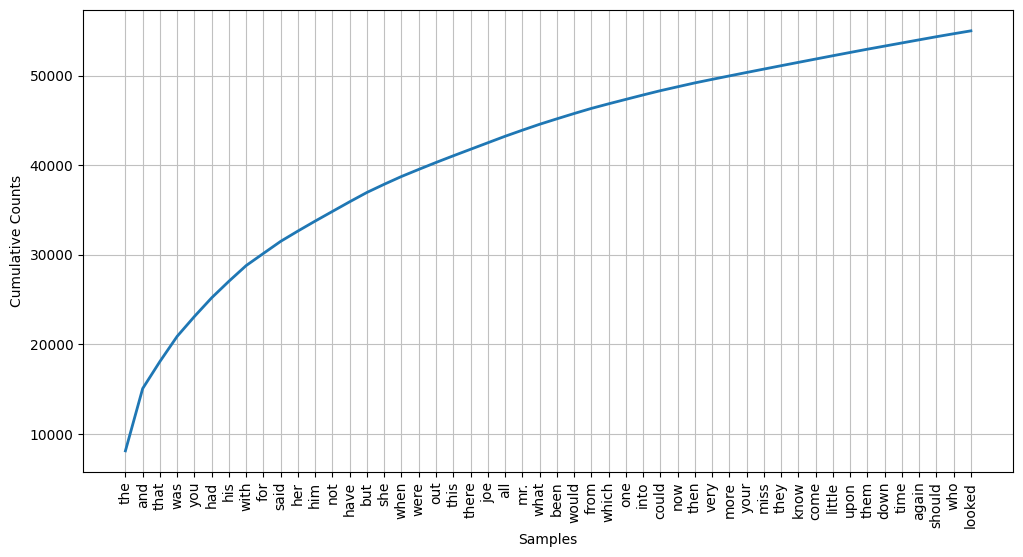

In [46]:
# visualization of the cumulative distribution of the top 50 words
plt.figure(figsize=(12,6))
freq_dist.plot(50, cumulative=True)
plt.show()

In [47]:
# add to the stopwords list
new_stop_words = ['miss', 'mr', 'said', 'one', 'upon', 'come', 'little', 'know', 'away', 'good', 'great']
stop_words.update(new_stop_words)

In [48]:
# remove stopwords
token_list6 = list(filter(lambda word: word not in stop_words, token_list5))
print('Some tokens after removing additional stop words:', token_list6[0:20])
print('Total words after removing additional stop words:', len(token_list6))

Some tokens after removing additional stop words: ['chapter', 'father', 'family', 'name', 'pirrip', 'christian', 'name', 'philip', 'infant', 'tongue', 'could', 'make', 'names', 'nothing', 'longer', 'explicit', 'pip', 'called', 'pip', 'came']
Total words after removing additional stop words: 77899


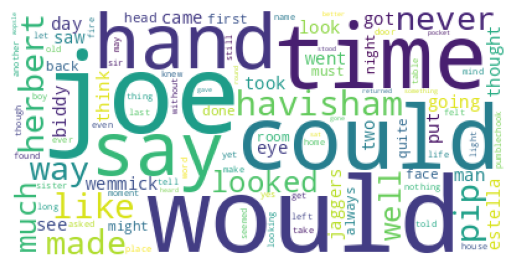

In [49]:
#represent the novel as a visual
from wordcloud import WordCloud

#generate the wordcloud data
wordcloud = WordCloud(stopwords = stop_words, max_words=100, background_color="white").generate(' '.join(token_list6))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
###### Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

#use the wordnet library to map their lemmatized form


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...


True

In [52]:
lemmatizer = WordNetLemmatizer()
token_list7 = [lemmatizer.lemmatize(word) for word in token_list6]

print('Total tokens after lemmatization:', len(token_list7))
print('Some tokens after lemmatization:', token_list7[0:20])


Total tokens after lemmatization: 77899
Some tokens after lemmatization: ['chapter', 'father', 'family', 'name', 'pirrip', 'christian', 'name', 'philip', 'infant', 'tongue', 'could', 'make', 'name', 'nothing', 'longer', 'explicit', 'pip', 'called', 'pip', 'came']


In [53]:
from nltk.util import ngrams
from collections import Counter

In [54]:
# find bigrams
bigrams = ngrams(token_list7, 2)
bigram_freq = Counter(bigrams)

print('Most common bigrams:', bigram_freq.most_common(10))

Most common bigrams: [(('mr.', 'jagger'), 214), (('mr.', 'wopsle'), 110), (('mr.', 'pumblechook'), 89), (('mr.', 'pip'), 66), (('dear', 'boy'), 62), (('mrs.', 'joe'), 60), (('mrs.', 'pocket'), 53), (('mr.', 'pocket'), 52), (('old', 'chap'), 37), (('mr.', 'wemmick'), 34)]


In [55]:
#find trigrams and print the most common 10
trigrams = ngrams(token_list7, 3)
trigram_freq = Counter(trigrams)
print('Most common trigrams:', trigram_freq.most_common(10))

Most common trigrams: [(('pale', 'young', 'gentleman'), 19), (('mr.', 'wopsle', 'great-aunt'), 15), (('mill', 'pond', 'bank'), 12), (('pip', 'old', 'chap'), 11), (('old', 'chap', 'joe'), 11), (('pip', 'mr.', 'jagger'), 8), (('three', 'jolly', 'bargeman'), 7), (('tom', 'jack', 'richard'), 7), (('old', 'bill', 'barley'), 7), (('dear', 'old', 'pip'), 6)]


In [59]:
### Parts of Speech Tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(token_list6)
print('Some parts of speech tags:', pos_tags[0:20])

#tag and print the first 20 tokens
nltk.pos_tag(token_list6[0:20])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Some parts of speech tags: [('chapter', 'NN'), ('father', 'PRP'), ('family', 'NN'), ('name', 'NN'), ('pirrip', 'NN'), ('christian', 'JJ'), ('name', 'NN'), ('philip', 'NN'), ('infant', 'NN'), ('tongue', 'NN'), ('could', 'MD'), ('make', 'VB'), ('names', 'NNS'), ('nothing', 'NN'), ('longer', 'RB'), ('explicit', 'JJ'), ('pip', 'NN'), ('called', 'VBN'), ('pip', 'NN'), ('came', 'VBD')]


[('chapter', 'NN'),
 ('father', 'PRP'),
 ('family', 'NN'),
 ('name', 'NN'),
 ('pirrip', 'NN'),
 ('christian', 'JJ'),
 ('name', 'NN'),
 ('philip', 'NN'),
 ('infant', 'NN'),
 ('tongue', 'NN'),
 ('could', 'MD'),
 ('make', 'VB'),
 ('names', 'NNS'),
 ('nothing', 'NN'),
 ('longer', 'RB'),
 ('explicit', 'JJ'),
 ('pip', 'NN'),
 ('called', 'VBN'),
 ('pip', 'NN'),
 ('came', 'VBD')]

In [60]:
#sentiment analysis

from nltk.tokenize import sent_tokenize
filedata = filedata.replace('\n', ' ')
sentences = sent_tokenize(filedata)

In [61]:
print(sentences[0:10])

['Chapter I.', 'My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip.', 'So, I called myself Pip, and came to be called Pip.', 'I give Pirrip as my father’s family name, on the authority of his tombstone and my sister,—Mrs.', 'Joe Gargery, who married the blacksmith.', 'As I never saw my father or my mother, and never saw any likeness of either of them (for their days were long before the days of photographs), my first fancies regarding what they were like were unreasonably derived from their tombstones.', 'The shape of the letters on my father’s, gave me an odd idea that he was a square, stout, dark man, with curly black hair.', 'From the character and turn of the inscription, “_Also Georgiana Wife of the Above_,” I drew a childish conclusion that my mother was freckled and sickly.', 'To five little stone lozenges, each about a foot and a half long, which were arranged in a neat row besid

In [62]:
#create a dataframe with sentences

import pandas as pd
df = pd.DataFrame(sentences, columns=['sentence'])
print(df.head())

                                            sentence
0                                         Chapter I.
1  My father’s family name being Pirrip, and my C...
2  So, I called myself Pip, and came to be called...
3  I give Pirrip as my father’s family name, on t...
4           Joe Gargery, who married the blacksmith.


In [63]:
df.shape

(7131, 1)

In [64]:
df.head()

,sentence
0,Chapter I.
1,"My father’s family name being Pirrip, and my C..."
2,"So, I called myself Pip, and came to be called..."
3,"I give Pirrip as my father’s family name, on t..."
4,"Joe Gargery, who married the blacksmith."


In [65]:
df.tail()

,sentence
7126,"To me, the remembrance of our last parting has..."
7127,"I have been bent and broken, but—I hope—into a..."
7128,"Be as considerate and good to me as you were, ..."
7129,"“And will continue friends apart,” said Estella."
7130,"I took her hand in mine, and we went out of th..."


In [66]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
#### Sentiment Analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
df['compound'] = df['sentence'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['sentence']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['sentence']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['sentence']]
df.head(10)

,sentence,compound,neg,neu,pos
0,Chapter I.,0.0000,0.000,1.000,0.000
1,"My father’s family name being Pirrip, and my C...",0.0000,0.000,1.000,0.000
2,"So, I called myself Pip, and came to be called...",0.0000,0.000,1.000,0.000
3,"I give Pirrip as my father’s family name, on t...",0.0772,0.000,0.925,0.075
4,"Joe Gargery, who married the blacksmith.",0.0000,0.000,1.000,0.000
5,"As I never saw my father or my mother, and nev...",0.3612,0.000,0.943,0.057
6,"The shape of the letters on my father’s, gave ...",-0.1531,0.085,0.852,0.063
7,From the character and turn of the inscription...,-0.2960,0.081,0.919,0.000
8,"To five little stone lozenges, each about a fo...",0.4404,0.043,0.891,0.065
9,"Ours was the marsh country, down by the river,...",0.0000,0.000,1.000,0.000


In [73]:
#get the number of positive, neutral, and negative scores
pos_sent = df.loc[df['compound'] > 0]
neg_sent = df.loc[df['compound'] < 0]
neu_sent = df.loc[df['compound'] == 0]

In [75]:
print(df.shape)
print(len(pos_sent))
print(len(neg_sent))
print(len(neu_sent))


(7131, 5)
2748
2071
2312


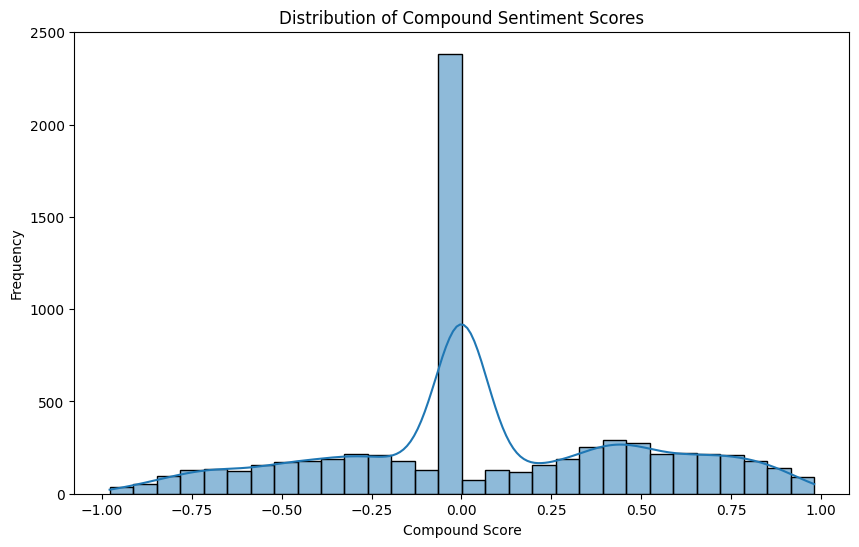

In [ ]:
# visualize distribution of sentiment scores
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['compound'], bins=30, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()